# **CONTENT-BASED RECOMMENDER USING JACCARD SIMILARITY**

In [41]:
# importing the required libraries
import pandas as pd
import numpy as np

In [42]:
# get the dtaframe from the csv file
df = pd.read_csv("/content/new_df.csv")

In [43]:
# displaying some rows of the datasets
df.head()

,movieId,title,genres,imdbId,tmdbId,rating,tag,new_genres,new_title,text,transformed_text
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,3.920930,"pixar,pixar,fun",Adventure Animation Children Comedy Fantasy,Toy Story 1995,Toy Story 1995 Adventure Animation Children C...,toy stori 1995 adventur anim children comedi f...
1,2,Jumanji (1995),Adventure|Children|Fantasy,113497,8844.0,3.431818,"fantasy,magic board game,Robin Williams,game",Adventure Children Fantasy,Jumanji 1995,Jumanji 1995 Adventure Children Fantasy,jumanji 1995 adventur children fantasi
2,3,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,3.259615,"moldy,old",Comedy Romance,Grumpier Old Men 1995,Grumpier Old Men 1995 Comedy Romance,grumpier old men 1995 comedi romanc
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,114885,31357.0,2.357143,NaN,Comedy Drama Romance,Waiting to Exhale 1995,Waiting to Exhale 1995 Comedy Drama Romance,wait exhal 1995 comedi drama romanc
4,5,Father of the Bride Part II (1995),Comedy,113041,11862.0,3.071429,"pregnancy,remake",Comedy,Father of the Bride Part II 1995,Father of the Bride Part II 1995 Comedy,father bride part ii 1995 comedi


In [44]:
def fit(df):
    # Convert the transformed text to sets of words.
    df['word_set'] = df['transformed_text'].apply(lambda x: set(x.split()))
    return df

In [45]:
df = fit(df)

**Jaccard Similarity:**

Jaccard similarity is a measure used to compare the similarity and dissimilarity between two sets. It's particularly useful when dealing with categorical data or items that can be represented as sets, such as text documents, tags, or user preferences.

The Jaccard similarity coefficient is defined as the size of the intersection of two sets divided by the size of the union of the two sets. It can be calculated using the following formula:

J(A,B)= ∣A∪B∣/
        ∣A∩B∣

Where:

*   A and B are the sets being compared.
*   ∣A∩B∣ represents the number of elements common to both sets A and B.
*   ∣A∪B∣ represents the total number of unique elements in sets A and B, including duplicates.






In [46]:
# calculate the Jaccard similarity between two sets.
def jaccard_similarity(set1, set2):
    # find the intersection between the sets
    intersection = len(set1.intersection(set2))
    # find the union of the sets
    union = len(set1.union(set2))
    # return the jaccard similarity
    return intersection / union if union != 0 else 0

In [47]:
# recommend similar movies based on Jaccard similarity.
def recommend_movies(df, movie_title, k=5):
    # get the transformed text of the movie title
    input_word_set = set(df[df['title'] == movie_title]['transformed_text'].iloc[0].split())
    # get jaccard similarities with other movies
    similarities = df['word_set'].apply(lambda x: jaccard_similarity(input_word_set, x))
    # get indices of the top k similar movies
    indices = similarities.argsort()[-k-1:-1][::-1]
    # get their titles
    recommended_movies = df.iloc[indices]['title'].tolist()
    return recommended_movies

In [48]:
movie_title = "Jumanji (1995)"
recommended_movies = recommend_movies(df, movie_title)

In [49]:
recommended_movies

['Indian in the Cupboard, The (1995)',
 'Tall Tale (1995)',
 'Casper (1995)',
 'Toy Story (1995)',
 'Gordy (1995)']

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(genres_text, movie_title):
    # generate and plot a word cloud based on movie genres.
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Word Cloud of Genres of Similar Movies to "{}"'.format(movie_title))
    plt.axis('off')
    plt.show()


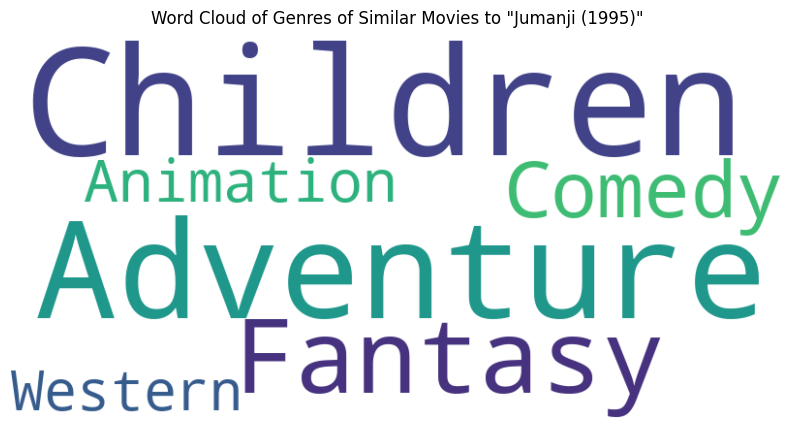

In [51]:
# plot the wordcloud
genres_text = ', '.join(df[df['title'].isin(recommended_movies)]['genres'].dropna())
plot_wordcloud(genres_text, movie_title)

In [52]:
def plot_similarity(recommended_movies, similarities, movie_title):

  # plotting the similarities
  plt.figure(figsize=(10, 6))
  bars = plt.barh(recommended_movies, similarities, color='purple')
  plt.xlabel('Jaccard Similarity')
  plt.title('Top 10 Similar Movies to "{}"'.format(movie_title))
  plt.gca().invert_yaxis()

  # adding annotations
  for bar, similarity in zip(bars, similarities):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, '{:.2f}'.format(similarity), va='center', ha='left', fontsize=8)

  plt.show()



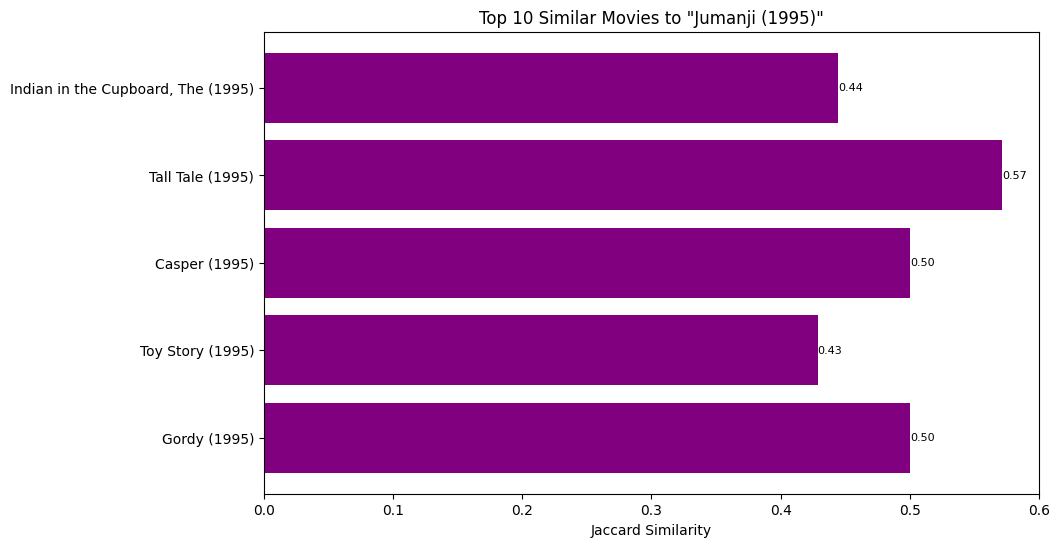

In [53]:
# plot the similarities on a bar graph
input_word_set = set(df[df['title'] == movie_title]['transformed_text'].iloc[0].split())
similarities = df[df['title'].isin(recommended_movies)].set_index('title')['word_set'].apply(lambda x: jaccard_similarity(input_word_set, x))
plot_similarity(recommended_movies, similarities, movie_title)